Reading the dataset and importing libraries for the analysis. There is 18182 samples and 24 columns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


df = pd.read_csv("recipe_reviews.csv")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)
print(df.shape)
df.head()

(18182, 24)


,Unnamed: 0,recipe_number,recipe_code,likes_score,dislike_index,response_level,user_index,ranking_value,vote_ratio,score_log,region,device_type,recipe_name,comment_id,user_id,user_name,user_score,created_at,responses,likes,dislikes,ranking_score,text,stars
0,0,1,14299,0.104335,-0.087082,-0.001580,1.172032,539.698328,0.000000,0.693147,North,Tablet,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,527,"I tweaked it a little, removed onions because ...",5
1,1,1,14299,6.970958,-0.094496,-0.002169,50.629458,720.511995,0.875000,3.931826,West,Mobile,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,724,Bush used to have a white chili bean and it ma...,5
2,2,1,14299,3.136047,-0.047194,0.014539,10.742998,717.194563,0.750000,2.397895,North,Desktop,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,710,I have a very complicated white chicken chili ...,5
3,3,1,14299,2.319913,-0.107932,2.012194,0.865812,585.875342,0.666667,0.693147,South,Tablet,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,581,"In your introduction, you mentioned cream chee...",0
4,4,1,14299,6.950816,0.142649,1.009770,8.985971,815.148751,0.875000,2.397895,North,Desktop,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,0


Exploring some texts to se how is the structure of the review.

In [ ]:
df['text'][0]

'I tweaked it a little, removed onions because of onion haters in my house, used Italian seasoning instead of just oregano, and use a paprika/ cayenne mix and a little more than the recipe called for.. we like everything a bit more hot. The chili was amazing! It was easy to make and everyone absolutely loved it. It will now be a staple meal in our house.'

In [ ]:
df['text'][3]

'In your introduction, you mentioned cream cheese but there is none listed in the ingredients!'

Distribution of Ranking Score shows data skewed to the right.

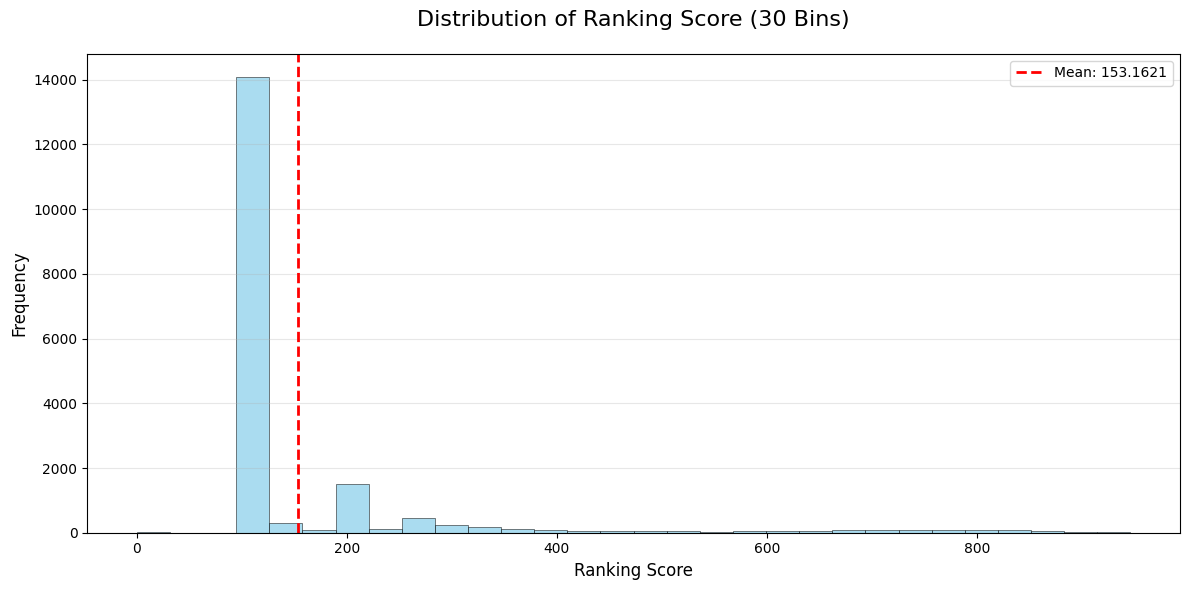

Ranking Score Summary Statistics:
Mean: 153.162138
Median: 100.000000
Standard Deviation: 141.075316
Min: 0.000000
Max: 946.000000
Total Count: 18,182

Histogram Bin Information:
Number of bins: 30
Bin width: 31.533333


In [ ]:
# Create a histogram with 30 bins for ranking_score
plt.figure(figsize=(12, 6))

# Create histogram
n, bins, patches = plt.hist(df['ranking_score'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# Customize the chart
plt.title('Distribution of Ranking Score (30 Bins)', fontsize=16, pad=20)
plt.xlabel('Ranking Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add some statistics to the plot
mean_val = df['ranking_score'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

# Print summary statistics
print("Ranking Score Summary Statistics:")
print("=" * 40)
print(f"Mean: {df['ranking_score'].mean():.6f}")
print(f"Median: {df['ranking_score'].median():.6f}")
print(f"Standard Deviation: {df['ranking_score'].std():.6f}")
print(f"Min: {df['ranking_score'].min():.6f}")
print(f"Max: {df['ranking_score'].max():.6f}")
print(f"Total Count: {len(df):,}")

# Print bin information
print(f"\nHistogram Bin Information:")
print(f"Number of bins: {len(n)}")
print(f"Bin width: {bins[1] - bins[0]:.6f}")


The following barchart shows the correlation of ranking score with all the numerical values. There is a high correlation between the vote ratio and ranking score. Followed by likes and likes score. The graph also indicates there is a strong correlation between dislikes and dislikes index to ranking score. The same behaviour with response level and responses, user score and score log.

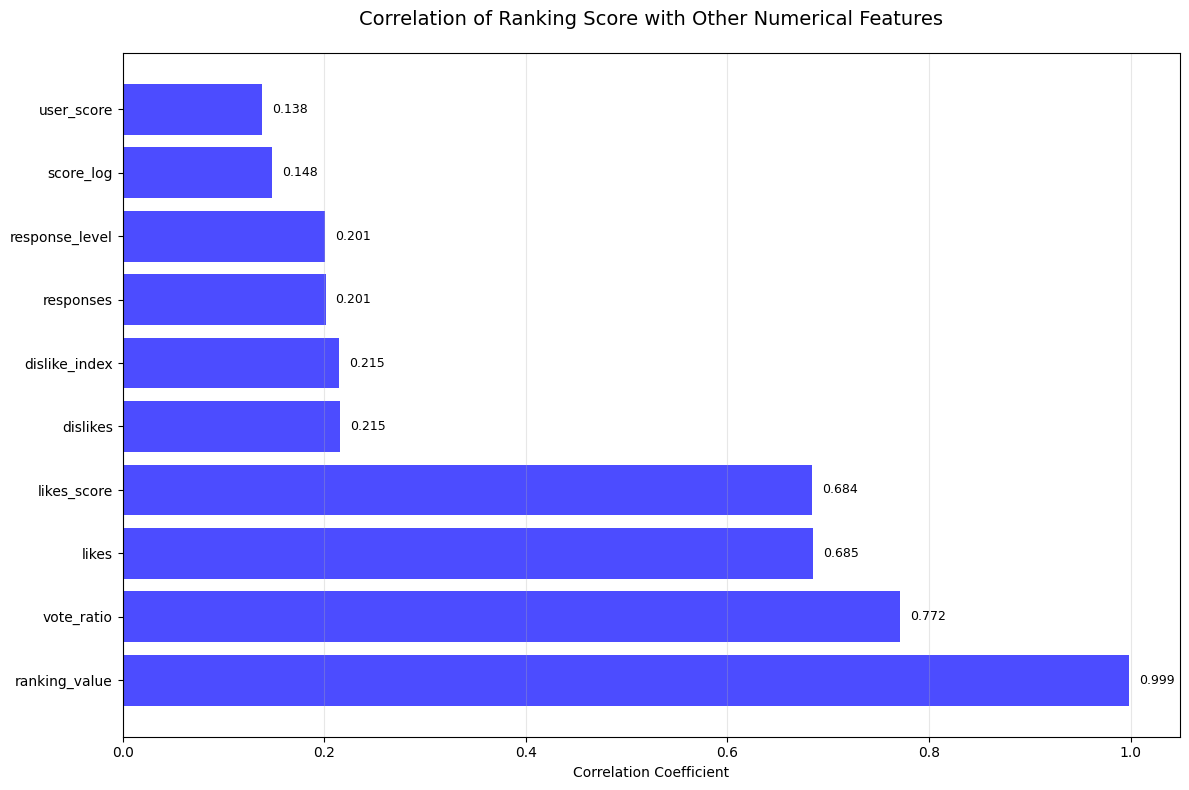

Correlation Analysis: Ranking Score vs Other Numerical Features
Feature             Correlation    Strength
-----------------------------------------------------------------
ranking_value       0.9987         Strong
vote_ratio          0.7715         Strong
likes               0.6848         Moderate
likes_score         0.6843         Moderate
dislikes            0.2154         Weak
dislike_index       0.2151         Weak
responses           0.2013         Weak
response_level      0.2011         Weak
score_log           0.1482         Weak
user_score          0.1379         Weak

Summary:
Strongest positive correlation: ranking_value (0.9987)
Strongest negative correlation: user_score (0.1379)
Number of features with moderate+ correlation (|r| ≥ 0.3): 4


In [ ]:
# Select numerical features including ranking_score
numerical_features = [
    'ranking_score', 'likes_score', 'dislike_index', 'response_level',
    'user_score', 'ranking_value', 'vote_ratio', 'score_log',
    'likes', 'dislikes', 'responses'
]

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Extract correlations specifically with ranking_score
ranking_score_corr = correlation_matrix['ranking_score'].drop('ranking_score').sort_values(key=abs, ascending=False)

# Create a horizontal bar chart of correlations with ranking_score
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in ranking_score_corr.values]
bars = plt.barh(range(len(ranking_score_corr)), ranking_score_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(ranking_score_corr)), ranking_score_corr.index)
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Ranking Score with Other Numerical Features', fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (feature, corr_val) in enumerate(ranking_score_corr.items()):
    plt.text(corr_val + (0.01 if corr_val >= 0 else -0.01), i, f'{corr_val:.3f}',
             va='center', ha='left' if corr_val >= 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

# Print detailed correlation results
print("Correlation Analysis: Ranking Score vs Other Numerical Features")
print("=" * 65)
print("Feature".ljust(20) + "Correlation".ljust(15) + "Strength")
print("-" * 65)

for feature, corr_val in ranking_score_corr.items():
    if abs(corr_val) >= 0.7:
        strength = "Strong"
    elif abs(corr_val) >= 0.3:
        strength = "Moderate"
    elif abs(corr_val) >= 0.1:
        strength = "Weak"
    else:
        strength = "Very Weak"

    print(f"{feature.ljust(20)}{f'{corr_val:.4f}'.ljust(15)}{strength}")

# Summary statistics
print(f"\nSummary:")
print(f"Strongest positive correlation: {ranking_score_corr.idxmax()} ({ranking_score_corr.max():.4f})")
print(f"Strongest negative correlation: {ranking_score_corr.idxmin()} ({ranking_score_corr.min():.4f})")
print(f"Number of features with moderate+ correlation (|r| ≥ 0.3): {len(ranking_score_corr[abs(ranking_score_corr) >= 0.3])}")

The next histogram shows the distribution of Vote Ratio. The data is also skewed to the right. Maximum value is 0.97 and minimum value is 0.0 and the majority of the samples has a vote ratio of 0.

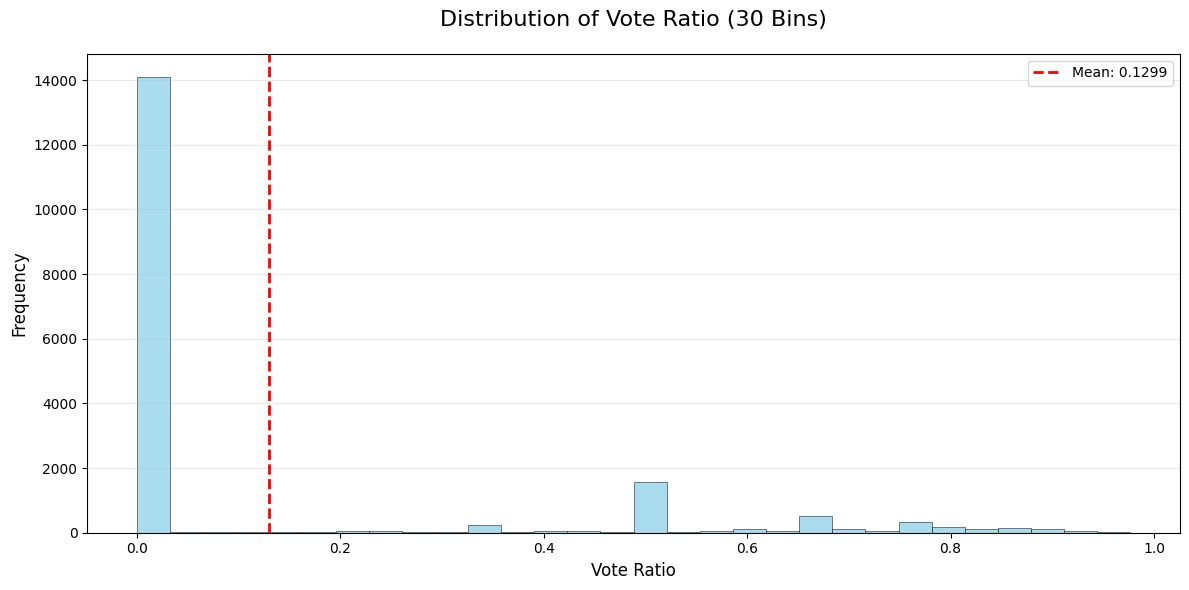

Vote Ratio Summary Statistics:
Mean: 0.129895
Median: 0.000000
Standard Deviation: 0.256619
Min: 0.000000
Max: 0.976744
Total Count: 18,182

Histogram Bin Information:
Number of bins: 30
Bin width: 0.032558


In [ ]:
# Create a histogram with 30 bins for ranking_score
plt.figure(figsize=(12, 6))

# Create histogram
n, bins, patches = plt.hist(df['vote_ratio'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# Customize the chart
plt.title('Distribution of Vote Ratio (30 Bins)', fontsize=16, pad=20)
plt.xlabel('Vote Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add some statistics to the plot
mean_val = df['vote_ratio'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

# Print summary statistics
print("Vote Ratio Summary Statistics:")
print("=" * 40)
print(f"Mean: {df['vote_ratio'].mean():.6f}")
print(f"Median: {df['vote_ratio'].median():.6f}")
print(f"Standard Deviation: {df['vote_ratio'].std():.6f}")
print(f"Min: {df['vote_ratio'].min():.6f}")
print(f"Max: {df['vote_ratio'].max():.6f}")
print(f"Total Count: {len(df):,}")

# Print bin information
print(f"\nHistogram Bin Information:")
print(f"Number of bins: {len(n)}")
print(f"Bin width: {bins[1] - bins[0]:.6f}")

The following histograms show the distribution of the other numerical features. The data is skewed to the right.

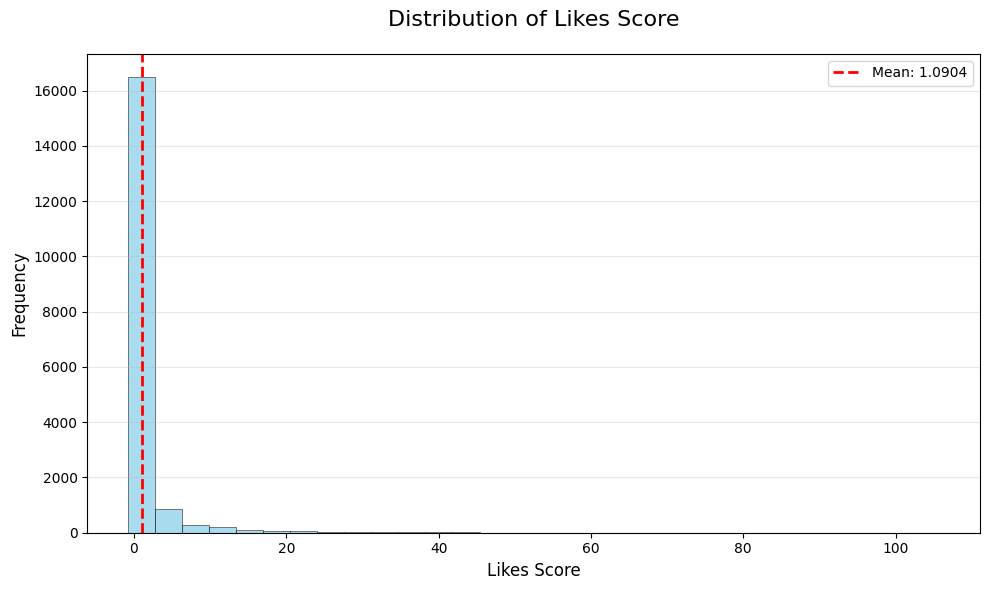

Likes Score Summary Statistics:
count    18182.000000
mean         1.090385
std          4.204683
min         -0.805890
25%         -0.096429
50%          0.078797
75%          0.383414
max        105.766878
Name: likes_score, dtype: float64




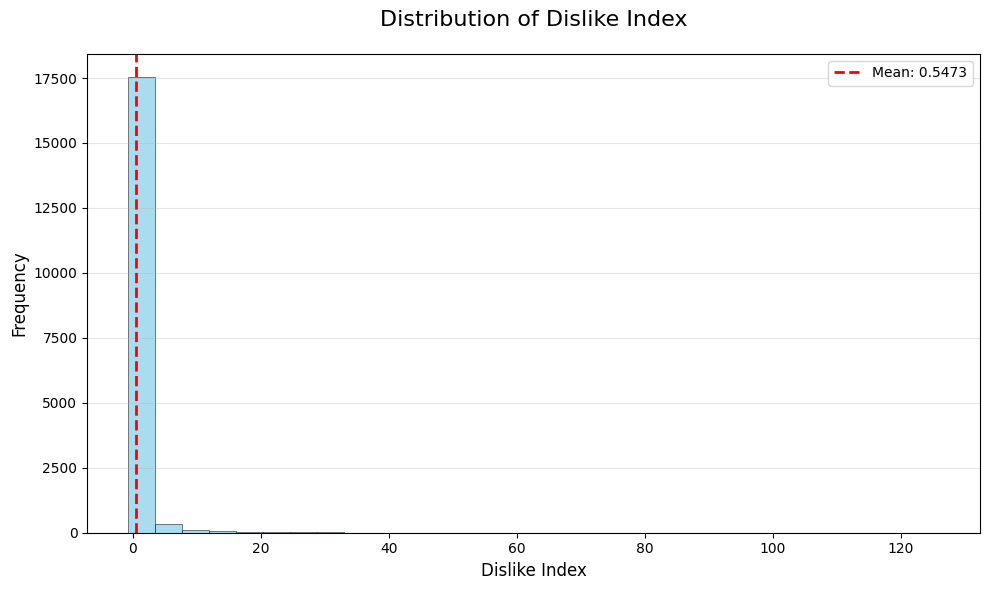

Dislike Index Summary Statistics:
count    18182.000000
mean         0.547333
std          3.474311
min         -0.774810
25%         -0.099743
50%          0.029246
75%          0.188243
max        126.052512
Name: dislike_index, dtype: float64




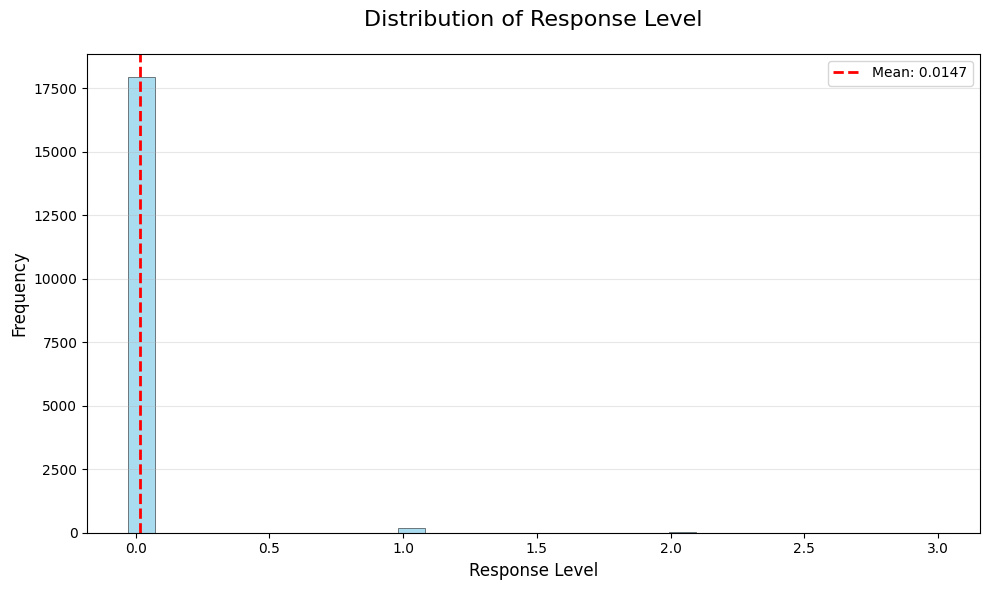

Response Level Summary Statistics:
count    18182.000000
mean         0.014671
std          0.138211
min         -0.029633
25%         -0.004531
50%          0.000193
75%          0.004917
max          3.004809
Name: response_level, dtype: float64




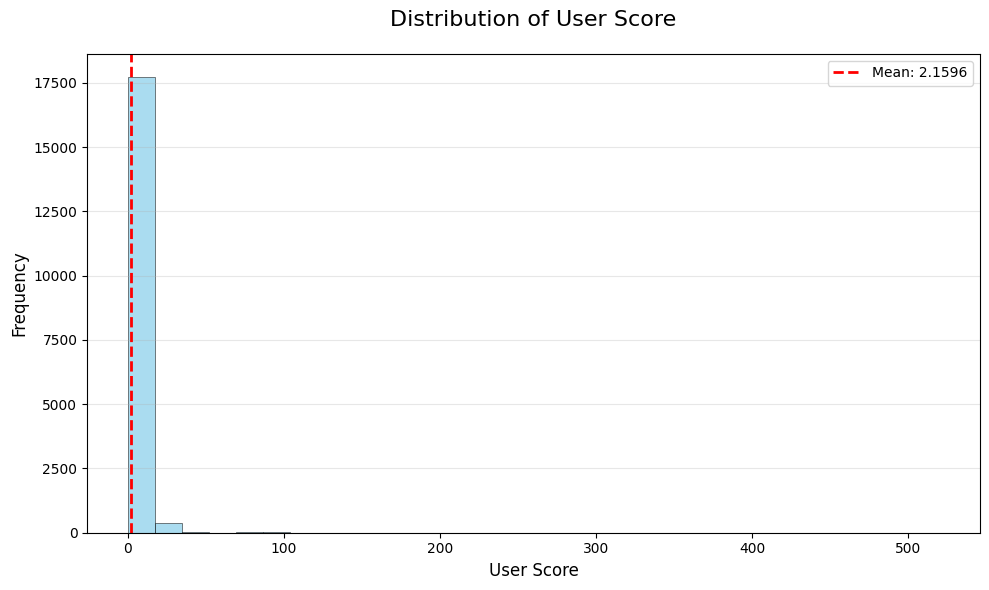

User Score Summary Statistics:
count    18182.000000
mean         2.159608
std         10.014666
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        520.000000
Name: user_score, dtype: float64




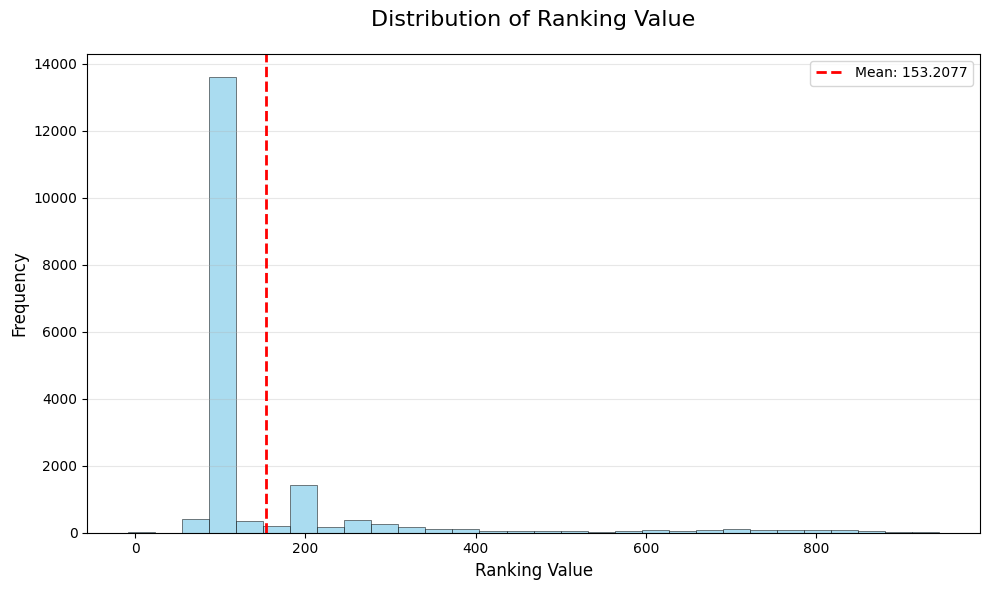

Ranking Value Summary Statistics:
count    18182.000000
mean       153.207674
std        141.249272
min         -8.726157
25%         96.796338
50%        102.660964
75%        113.329761
max        944.834309
Name: ranking_value, dtype: float64




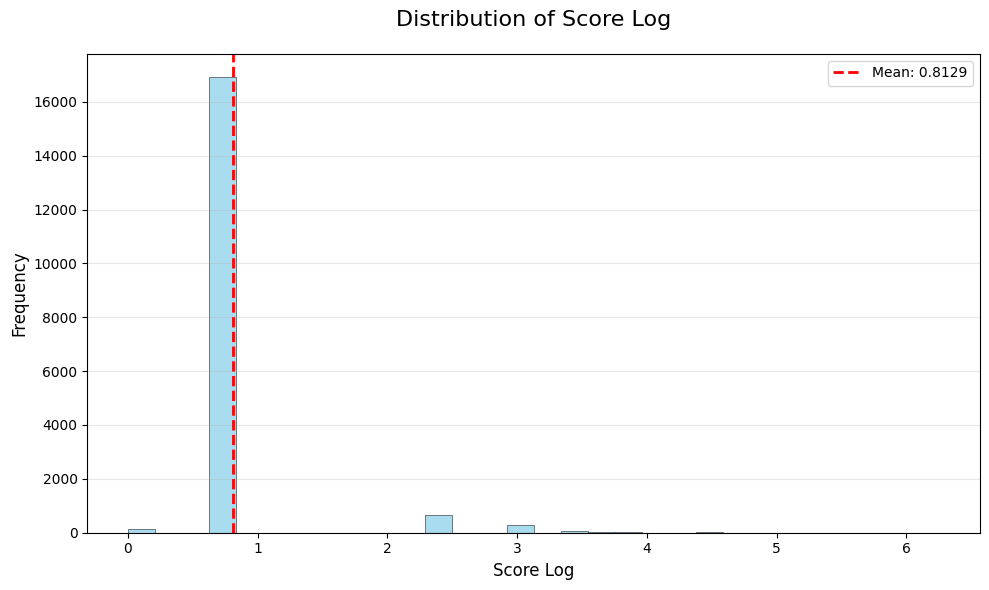

Score Log Summary Statistics:
count    18182.000000
mean         0.812869
std          0.521095
min          0.000000
25%          0.693147
50%          0.693147
75%          0.693147
max          6.255750
Name: score_log, dtype: float64




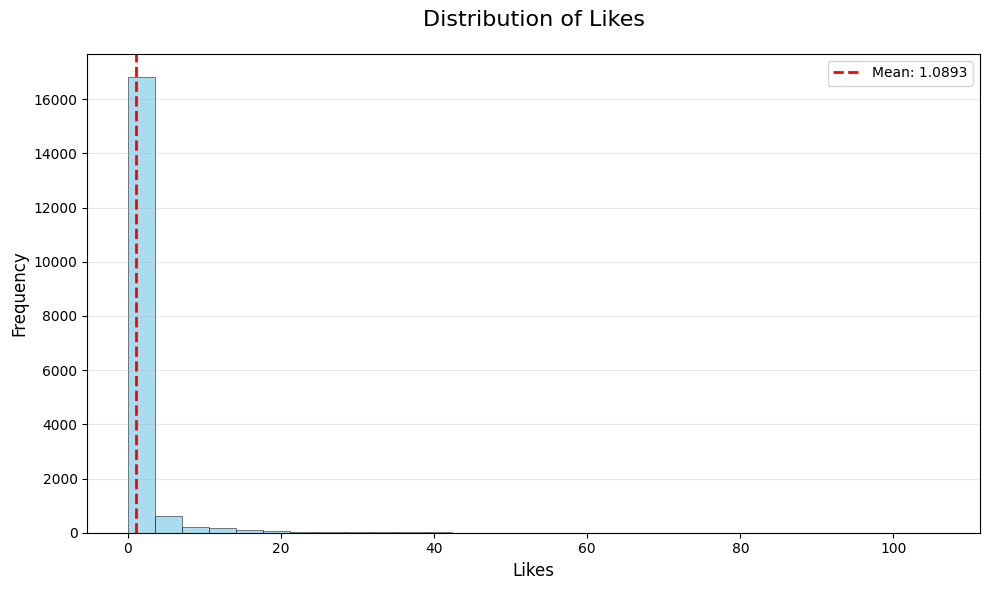

Likes Summary Statistics:
count    18182.000000
mean         1.089264
std          4.201004
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        106.000000
Name: likes, dtype: float64




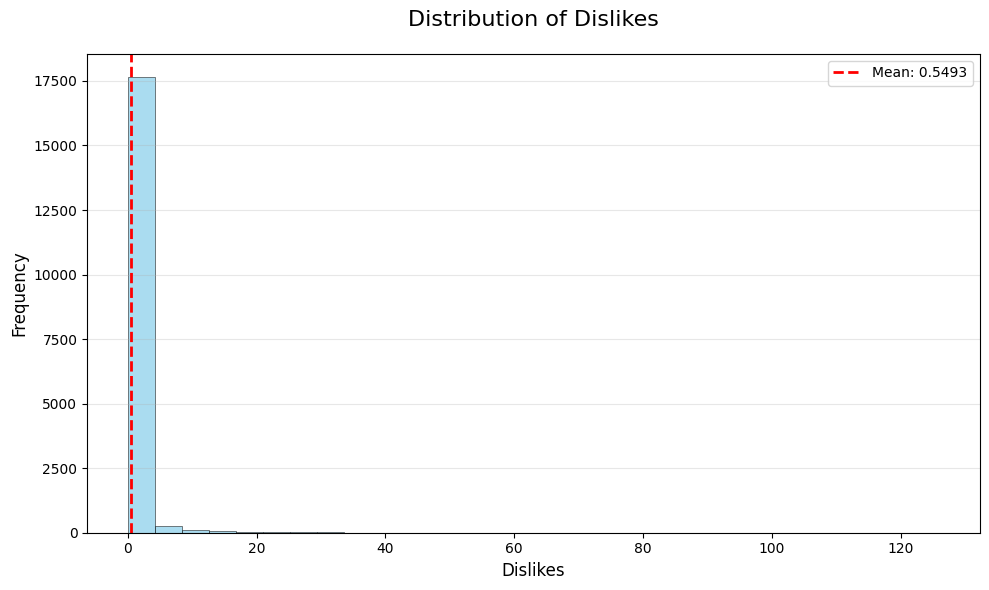

Dislikes Summary Statistics:
count    18182.000000
mean         0.549335
std          3.470124
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        126.000000
Name: dislikes, dtype: float64




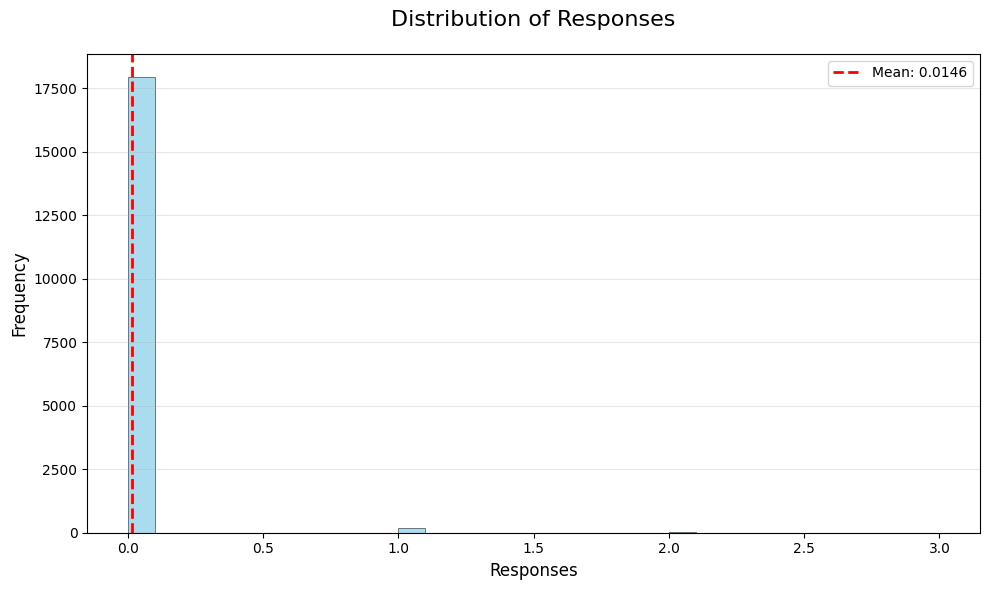

Responses Summary Statistics:
count    18182.000000
mean         0.014630
std          0.137974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: responses, dtype: float64




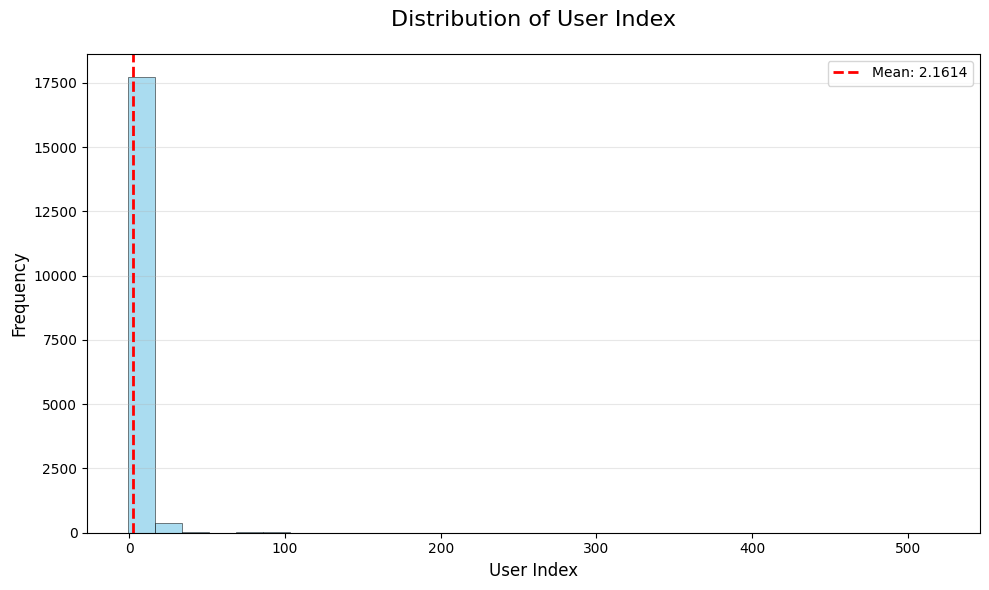

User Index Summary Statistics:
count    18182.000000
mean         2.161411
std         10.030733
min         -1.093772
25%          0.677679
50%          1.040708
75%          1.415742
max        520.440341
Name: user_index, dtype: float64




In [ ]:
# Select remaining numerical features (excluding 'ranking_score' and 'vote_ratio', 'stars')
remaining_numerical_features = [
    'likes_score', 'dislike_index', 'response_level', 'user_score',
    'ranking_value', 'score_log', 'likes', 'dislikes', 'responses','user_index'
]

# Create histograms for each remaining numerical feature
for feature in remaining_numerical_features:
    plt.figure(figsize=(10, 6))

    # Create histogram
    plt.hist(df[feature], bins=30, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)

    # Customize the chart
    plt.title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=16, pad=20)
    plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)

    # Add mean line
    mean_val = df[feature].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"{feature.replace('_', ' ').title()} Summary Statistics:")
    print("=" * 40)
    print(df[feature].describe())
    print("\n")

 A bar chart was plotted to see the frequency of the stars rating for each sample or review. In this case we observed data is unbalanced with 5 stars. Some samples are not rated showing 0 stars. There is a 76% of 5 stars this shows the dataset is unbalanced.

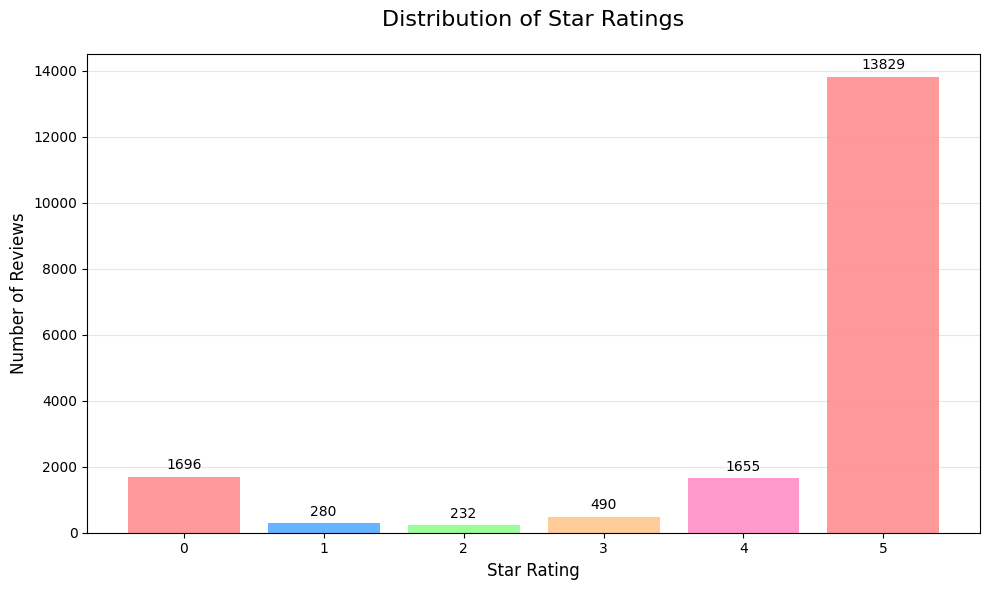

Star Rating Distribution:
0 stars: 1,696 reviews (9.3%)
1 stars: 280 reviews (1.5%)
2 stars: 232 reviews (1.3%)
3 stars: 490 reviews (2.7%)
4 stars: 1,655 reviews (9.1%)
5 stars: 13,829 reviews (76.1%)

Total reviews: 18,182


In [ ]:
# Count the occurrences of each star rating
star_counts = df['stars'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(star_counts.index, star_counts.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])

# Customize the chart
plt.title('Distribution of Star Ratings', fontsize=16, pad=20)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(range(6))  # 0 to 5 stars

# Add value labels on top of bars
for i, (star, count) in enumerate(star_counts.items()):
    plt.text(star, count + max(star_counts.values) * 0.01, str(count),
             ha='center', va='bottom', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Display the chart
plt.tight_layout()
plt.show()

# Print the exact counts
print("Star Rating Distribution:")
print("=" * 30)
for star, count in star_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{star} stars: {count:,} reviews ({percentage:.1f}%)")

print(f"\nTotal reviews: {len(df):,}")

Samples with 0 stars are removed. The top 10 best ranking score reviews is displayed with its corresponding stars and text. Then the top 10 worst ranking score. Some bad ranking score has 4 or 2 stars.

In [ ]:
df = df[df['stars']>0]
df["stars"] = df["stars"] - 1

print("Top 10 Best Ranking Score Reviews:")
print("=" * 50)
top_10_best = df.nlargest(10, 'ranking_score')
for i, (idx, row) in enumerate(top_10_best.iterrows(), 1):
    print(f"{i}. Ranking Score: {row['ranking_score']:.4f}")
    print(f"   Stars: {row['stars']}")
    print(f"   Text: {row['text'][:400]}{'...' if len(row['text']) > 400 else ''}")
    print("-" * 30)

print("\n\nTop 10 Worst Ranking Score Reviews:")
print("=" * 50)
top_10_worst = df.nsmallest(10, 'ranking_score')
for i, (idx, row) in enumerate(top_10_worst.iterrows(), 1):
    print(f"{i}. Ranking Score: {row['ranking_score']:.4f}")
    print(f"   Stars: {row['stars']}")
    print(f"   Text: {row['text'][:400]}{'...' if len(row['text']) > 400 else ''}")
    print("-" * 30)

Top 10 Best Ranking Score Reviews:
1. Ranking Score: 946.0000
   Stars: 4
   Text: With only 2 of us at home now, I make this using 2 round cake pans. The first one is perfect for us for a couple days, and the second goes in the freezer for next time!
------------------------------
2. Ranking Score: 934.0000
   Stars: 4
   Text: Instead of a cans of chopped chilies and cans of stewed tomatoes. Just use 2 cans of Rotel they already have chilies and other seasonings.
------------------------------
3. Ranking Score: 931.0000
   Stars: 4
   Text: I followed the recipe, using whole milk and extra sharp cheddar cheese, but made 2 additions. I added a 1 /2 cup of parmesan cheese and 1/2 teaspoon of Dijon mustard. Came out amazing! Will absolutely make this again!!!
------------------------------
4. Ranking Score: 928.0000
   Stars: 4
   Text: Very good! To save using an extra pan, I did not divide the butter; I melted all of the butter to cook the vegetables in, then stirred in the flour to c

 The correlation analysis reveals significant redundancy in our dataset, with correlations of 0.999 between ranking_score/ranking_value, likes/likes_score, and dislikes/dislike_index - indicating these are essentially duplicate measures. The moderate correlation (0.770) between ranking_score and vote_ratio suggests our dataset captures user sentiment, while the consistent 0.68-0.69 correlations between likes and ranking metrics confirm that positive engagement drives content ranking

Largest Text in Dataset:
Text Length: 2742 characters
Stars: 4
Ranking Score: 100.0000

Text:
I made this recipe three times all summer long and these are my observations.  First and foremost, if you follow my recommendations, you will not have any problems at all, despite what others say here.  What I did is use Reynolds (brand) Release Foil (make sure dull side is facing up) in the 10X15X1 pan.  MAKE SURE YOU LEAVE ENOUGH FOIL HANGING OVER THE SHORT ENDS TO LIFT THE COOKIES OUT OF THE PAN LATER.  I ALSO sprayed it with nonstick cooking spray very lightly.  I made sure all of the graham crackers fit properly in the pan (trim using a paring knife if need be--it&#39;s much easier than you think).  Once the crackers are in the pan properly, I did use more than two cups of mini marshmallows...probably 2-1/2 cups total--enough to cover all of the crackers sufficiently.  Then what I did is I used 1 cup of butter and 1 cup of light brown (not dark brown) sugar.  Make sure you use real butter

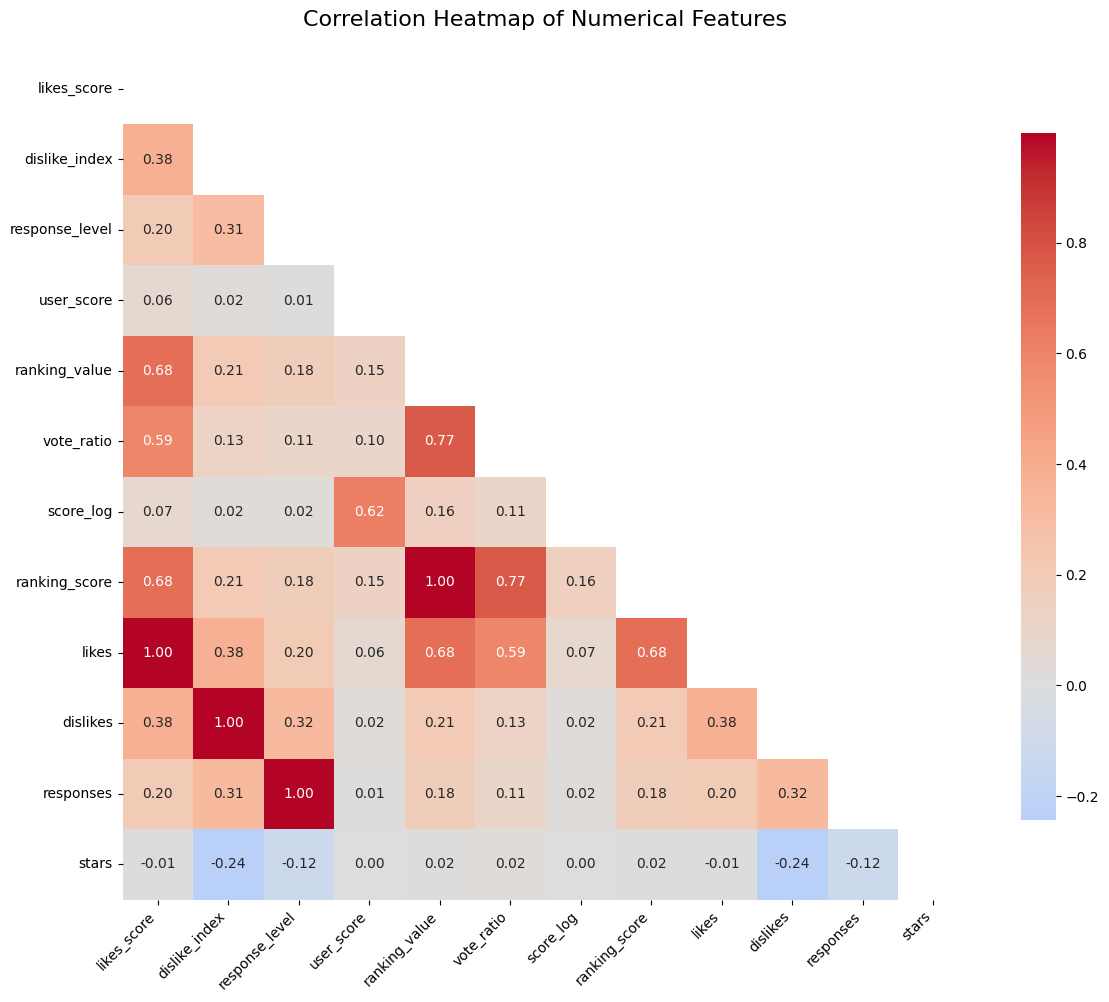


Top 10 Strongest Correlations:
1. ranking_score ↔ ranking_value: 0.999
2. likes ↔ likes_score: 0.999
3. dislikes ↔ dislike_index: 0.999
4. responses ↔ response_level: 0.998
5. ranking_score ↔ vote_ratio: 0.770
6. vote_ratio ↔ ranking_value: 0.769
7. likes ↔ ranking_score: 0.685
8. ranking_score ↔ likes_score: 0.684
9. likes ↔ ranking_value: 0.684
10. ranking_value ↔ likes_score: 0.684


In [ ]:
#Display the largest text of the dataset
largest_text_row = df.loc[df['text'].str.len().idxmax()]
print("Largest Text in Dataset:")
print("=" * 50)
print(f"Text Length: {len(largest_text_row['text'])} characters")
print(f"Stars: {largest_text_row['stars']}")
print(f"Ranking Score: {largest_text_row['ranking_score']:.4f}")
print("\nText:")
print(largest_text_row['text'])
print("=" * 50)

# Find correlations between numerical features in a heatmap
# Select numerical features
numerical_features = [
    'likes_score', 'dislike_index', 'response_level', 'user_score',
    'ranking_value', 'vote_ratio', 'score_log', 'ranking_score',
    'likes', 'dislikes', 'responses','stars'
]

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask for upper triangle
heatmap = sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Display top correlations (excluding self-correlations)
print("\nTop 10 Strongest Correlations:")
print("=" * 50)
corr_pairs = correlation_matrix.unstack()
# Remove self-correlations and duplicates
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
corr_pairs = corr_pairs.mask(mask.flatten()).dropna()
top_correlations = corr_pairs.abs().sort_values(ascending=False).head(10)

for i, (idx, value) in enumerate(top_correlations.items(), 1):
    feature1, feature2 = idx
    print(f"{i}. {feature1} ↔ {feature2}: {value:.3f}")

In [ ]:
# Calculate missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary DataFrame
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)


# Display the results
print("Missing Values Summary:")
print("=" * 50)
print(missing_df[missing_df['Missing_Count'] > 0])

df.head()

Missing Values Summary:
      Missing_Count  Missing_Percentage
text              2            0.012132


,Unnamed: 0,recipe_number,recipe_code,likes_score,dislike_index,response_level,user_index,ranking_value,vote_ratio,score_log,region,device_type,recipe_name,comment_id,user_id,user_name,user_score,created_at,responses,likes,dislikes,ranking_score,text,stars
0,0,1,14299,0.104335,-0.087082,-0.001580,1.172032,539.698328,0.000000,0.693147,North,Tablet,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,527,"I tweaked it a little, removed onions because ...",4
1,1,1,14299,6.970958,-0.094496,-0.002169,50.629458,720.511995,0.875000,3.931826,West,Mobile,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,724,Bush used to have a white chili bean and it ma...,4
2,2,1,14299,3.136047,-0.047194,0.014539,10.742998,717.194563,0.750000,2.397895,North,Desktop,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,710,I have a very complicated white chicken chili ...,4
5,5,1,14299,2.950819,1.046363,0.012384,0.807661,518.114099,0.600000,0.693147,West,Desktop,Creamy White Chili,sp_aUSaElGf_14299_c_2Do918IutExN0pWEOFMU4cbiT8v,u_BALTQJIvWtYr,nikhita,1,1661354351,0,3,1,518,amazing! my boyfriend loved it so much! going ...,4
6,6,1,14299,11.331714,-0.085230,0.009791,1.873077,842.622309,0.916667,0.693147,East,Mobile,Creamy White Chili,sp_aUSaElGf_14299_c_24hhcbywpsgGqG7yeDFH1IPZCb8,u_HuJVXMzQqJoI,Sandy1256,1,1644088805,0,11,0,833,Wow!!! This recipe is excellent as written!! ...,4


The descriptive statistics reveal several concerning patterns that require immediate attention. The score_log, ranking_score, and stars columns show identical quartile values (Q1=Q2=Q3), indicating potential data processing errors or system malfunctions in these metrics. Additionally, vote_ratio shows zero variance across most percentiles despite having a maximum of 0.977, suggesting highly skewed distributions or data collection issues. The wide range in ranking_score (0 to 946) with clustering around 100 indicates inconsistent scoring mechanisms.

In [ ]:
# Remove rows where the text column is null
cols_to_use = [
    "likes_score", "dislike_index", "response_level",
    "score_log", "ranking_score", "vote_ratio",
    "text", "stars"
]

df = df[cols_to_use]
df = df.dropna(subset=['text'])
df.describe()


,likes_score,dislike_index,response_level,score_log,ranking_score,vote_ratio,stars
count,16484.000000,16484.000000,16484.000000,16484.000000,16484.000000,16484.000000,16484.000000
mean,1.020927,0.490458,0.010825,0.817931,151.071463,0.128517,3.729981
std,3.953006,3.193350,0.115818,0.530383,137.330910,0.255233,0.738155
min,-0.805890,-0.774810,-0.029633,0.000000,0.000000,0.000000,0.000000
25%,-0.096543,-0.100324,-0.004550,0.693147,100.000000,0.000000,4.000000
50%,0.079747,0.027244,0.000148,0.693147,100.000000,0.000000,4.000000
75%,0.377342,0.184379,0.004848,0.693147,100.000000,0.000000,4.000000
max,105.766878,126.052512,3.003453,6.255750,946.000000,0.976744,4.000000


## SPLIT DATA INTO TRAIN / SET



In [ ]:
labels = df["stars"].astype(int).values
texts = df["text"].astype(str).values
numerical_data = df.drop(columns=["text", "stars"]).values

print(labels.shape)
print(numerical_data.shape)
print(texts.shape)

X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    texts, numerical_data, labels, test_size=0.2, random_state=42
)


(16484,)
(16484, 6)
(16484,)


## TOKENIZE TEXTS WITH BERT TOKENIZER

This code implements text preprocessing for BERT-based machine learning using the Hugging Face transformers library.

### Model Setup:

MODEL_NAME = "bert-base-uncased" specifies the pre-trained BERT model (uncased means it doesn't distinguish between uppercase/lowercase), and BertTokenizer.from_pretrained() loads the corresponding tokenizer that converts text into numerical tokens BERT can process.

### Text Encoding:
The tokenizer processes both training and test text data with key parameters: truncation=True cuts text longer than 128 tokens, padding="max_length" ensures all sequences are exactly 128 tokens (padding shorter ones), max_length=MAX_LEN sets the uniform sequence length, and return_tensors="pt" outputs PyTorch tensors ready for model input.

In [ ]:
MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

MAX_LEN = 128
train_encodings = tokenizer(
    list(X_text_train),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN,
    return_tensors="pt"
)
test_encodings = tokenizer(
    list(X_text_test),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN,
    return_tensors="pt"
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## SCALE NUMERIC FEATURES

In [ ]:
scaler = StandardScaler()
X_num_train_scaled = torch.tensor(scaler.fit_transform(X_num_train), dtype=torch.float32)
X_num_test_scaled = torch.tensor(scaler.transform(X_num_test), dtype=torch.float32)

## CREATE TENSORDATASET & DATALOADER

The following code creates PyTorch datasets and data loaders for a hybrid model that processes both text and numerical features.

### Label Conversion:

torch.tensor() converts target variables to PyTorch tensors with dtype=torch.long (required for classification tasks).

### Dataset Assembly:
TensorDataset combines four components per sample - input_ids (tokenized text), attention_mask (indicates real vs padded tokens), X_num_train_scaled (preprocessed numerical features), and labels - creating unified datasets that feed both text and numerical data to the model simultaneously.

### Batch Processing:
DataLoader creates efficient mini-batches of size 16 for training, with shuffle=True randomizing training order to improve model generalization, while test data uses shuffle=False to maintain consistent evaluation.

##

##

This setup enables the model to learn from both textual content and numerical metrics together, which is ideal for tasks like sentiment analysis where both review text and engagement metrics contribute to predictions.

In [ ]:
train_labels = torch.tensor(y_train, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(
    train_encodings["input_ids"],
    train_encodings["attention_mask"],
    X_num_train_scaled,
    train_labels
)

test_dataset = TensorDataset(
    test_encodings["input_ids"],
    test_encodings["attention_mask"],
    X_num_test_scaled,
    test_labels
)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)





## LOAD BERT MODEL

This code defines a custom PyTorch model that combines BERT's text understanding with numerical feature processing for multi-modal classification.

### Architecture Components:

The model inherits from nn.Module and integrates a pre-trained BERT model with separate numerical processing layers - num_dense transforms numerical features through a 32-unit dense layer with ReLU activation and dropout (0.2), while BERT processes text inputs.

### Feature Fusion:

In the forward pass, BERT's CLS token (768-dimensional text representation) is extracted and concatenated with the 32-dimensional numerical embedding, creating a combined 800-dimensional feature vector that captures both textual sentiment and numerical metrics.

### Classification Head:

The fused features pass through a two-layer classifier (800→128→5) with ReLU activation and dropout (0.3) for regularization, outputting probabilities for 5 classes.

### Deployment:

The model automatically detects and utilizes GPU if available, enabling faster training on the combined text-numerical dataset where both review content and engagement metrics contribute to the final prediction.

In [ ]:

bert_model = BertModel.from_pretrained(MODEL_NAME)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:

class BertWithNumeric(nn.Module):
    def __init__(self, bert_model, num_features, num_classes=5):
        super(BertWithNumeric, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.3)
        self.num_dense = nn.Sequential(
            nn.Linear(num_features, 32),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.fc = nn.Sequential(
            nn.Linear(768 + 32, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, input_ids, attention_mask, numeric_features):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = bert_output.last_hidden_state[:, 0, :]  # CLS token representation
        cls_embedding = self.dropout(cls_embedding)

        numeric_embedding = self.num_dense(numeric_features)
        combined = torch.cat((cls_embedding, numeric_embedding), dim=1)

        return self.fc(combined)

# Instantiate model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertWithNumeric(bert_model, num_features=X_num_train_scaled.shape[1]).to(device)

## TRAINING SETUP


This code implements a comprehensive solution for training on imbalanced datasets using dual-level class balancing strategies.

**Class Imbalance Analysis**: The code first extracts training labels to compute class distribution via np.bincount(), then calculates inverse frequency weights to penalize the model more heavily for misclassifying minority classes.

**Balanced Sampling**: WeightedRandomSampler ensures each training batch contains a balanced representation of all classes by sampling with replacement according to inverse class frequencies, preventing the model from being biased toward majority classes during training.

**Loss Function**: CrossEntropyLoss(weight=weights) applies the computed class weights directly to the loss calculation, providing additional protection against class imbalance at the optimization level.

**Training Setup**: The configuration uses AdamW optimizer (better for transformers) with a low learning rate (2e-5) suitable for fine-tuning pre-trained models, plus a linear learning rate scheduler with 10% warmup steps to stabilize initial training.

This dual-approach (weighted sampling + weighted loss) ensures robust performance across all classes, critical for applications where minority class accuracy matters.

However, the class distribution reveals an extremely skewed dataset with class 4 dominating (11,060 samples, 84% of data) while classes 0-2 are severely underrepresented (217-392 samples each, <3% each). This represents a ~51:1 ratio between majority and minority classes.

In [ ]:
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report


# Extract labels from your train_dataset
train_labels = train_dataset.tensors[-1].cpu().numpy()  # labels from dataset
num_classes = 5

# Compute counts
class_counts = np.bincount(train_labels, minlength=num_classes)
print("Class distribution:", class_counts)

# Loss weights (inverse frequency)
class_weights = np.sqrt(1.0 / np.where(class_counts == 0, 1, class_counts))
class_weights = class_weights / class_weights.sum() * num_classes  # Normalize
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("Gentler class weights:", class_weights)

# WeightedRandomSampler for balanced batches
original_weights = class_counts / class_counts.sum()
balanced_weights = np.ones(num_classes) / num_classes
mixed_weights = 0.7 * original_weights + 0.3 * balanced_weights
sample_weights = [mixed_weights[label] for label in train_labels]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

print("Mixed sampling weights:", mixed_weights)

# Split training data for validation
train_idx, val_idx = train_test_split(
    range(len(train_dataset)),
    test_size=0.15,
    stratify=train_labels,
    random_state=42
)

# Create validation dataset
val_dataset = torch.utils.data.Subset(train_dataset, val_idx)
train_dataset_split = torch.utils.data.Subset(train_dataset, train_idx)

# Update sampler for split dataset
train_labels_split = train_labels[train_idx]
sample_weights_split = [mixed_weights[label] for label in train_labels_split]
sampler = WeightedRandomSampler(sample_weights_split, num_samples=len(sample_weights_split), replacement=True)

# Data loaders
train_loader = DataLoader(train_dataset_split, batch_size=16, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# MODIFICATION 4: Focal Loss implementation for better imbalance handling
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

# MODIFICATION 5: Use Focal Loss with reduced class weights
focal_criterion = FocalLoss(alpha=weights, gamma=1.5)  # Reduced gamma for gentler focusing

# MODIFICATION 6: Improved optimizer settings
optimizer = AdamW(
    model.parameters(),
    lr=1e-5,  # Lower learning rate for stability
    weight_decay=0.01,  # L2 regularization
    eps=1e-8
)

# MODIFICATION 7: Improved learning rate schedule
num_epochs = 8  # Reduced epochs to prevent overfitting
num_training_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.15 * num_training_steps),  # More warmup
    num_training_steps=num_training_steps
)

# MODIFICATION 8: Early stopping implementation
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.01):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            return False
        else:
            self.counter += 1
            return self.counter >= self.patience

early_stopping = EarlyStopping(patience=3, min_delta=0.01)

print("=== TRAINING CONFIGURATION SUMMARY ===")
print(f"Original class distribution: {class_counts}")
print(f"Gentler class weights: {class_weights}")
print(f"Mixed sampling strategy: 70% original + 30% balanced")
print(f"Using Focal Loss with gamma=1.5")
print(f"Lower learning rate: 1e-5 with weight decay")
print(f"Validation split: 15% for early stopping")
print(f"Training epochs: {num_epochs} with early stopping")

Class distribution: [  217   191   392  1327 11060]
Gentler class weights: [1.49059176 1.58880976 1.10903576 0.60277207 0.20879064]
Mixed sampling weights: [0.07151892 0.07013877 0.08080837 0.13044059 0.64709335]
=== TRAINING CONFIGURATION SUMMARY ===
Original class distribution: [  217   191   392  1327 11060]
Gentler class weights: [1.49059176 1.58880976 1.10903576 0.60277207 0.20879064]
Mixed sampling strategy: 70% original + 30% balanced
Using Focal Loss with gamma=1.5
Lower learning rate: 1e-5 with weight decay
Validation split: 15% for early stopping
Training epochs: 8 with early stopping


## Model Training and Evaluation Framework

### Training Architecture

The training framework implements a comprehensive deep learning pipeline designed to address class imbalance while preventing overfitting through systematic validation monitoring. The architecture employs a hybrid approach combining BERT-based text representation learning with numerical feature integration, utilizing PyTorch's modular design principles for scalable model development.

### Training Loop Implementation

The training procedure follows a standard epoch-based optimization approach with enhanced monitoring capabilities. Each training epoch consists of forward propagation through the hybrid architecture, loss computation using Focal Loss with class weighting, and backpropagation with gradient clipping (maximum norm = 1.0) to ensure training stability. The implementation incorporates learning rate scheduling with linear warmup (15% of total steps) followed by linear decay, optimizing convergence for transformer-based architectures.

### Validation and Overfitting Prevention

A stratified validation split (15% of training data) maintains class distribution proportionality while providing unbiased performance estimation during training. The framework implements early stopping with configurable patience (3 epochs) and minimum improvement thresholds (δ = 0.01) to prevent overfitting to the artificially rebalanced training distribution. Model checkpointing preserves the optimal parameter configuration based on validation loss minimization.

### Performance Monitoring and Evaluation

The evaluation framework provides multi-granular performance assessment through per-epoch accuracy tracking, periodic classification reports (every 2 epochs), and comprehensive test set evaluation. Class-specific metrics including precision, recall, and F1-scores enable detailed analysis of model behavior across the imbalanced class distribution. The implementation generates confusion matrices and class distribution analyses to facilitate interpretation of model performance in the context of the original data imbalance.

### Technical Implementation Details

The training procedure utilizes automatic differentiation with the AdamW optimizer (learning rate = 1×10⁻⁵, weight decay = 0.01) for robust parameter optimization. Progress monitoring through tqdm provides real-time training statistics, while comprehensive logging captures training dynamics for post-hoc analysis. The framework supports GPU acceleration with automatic device detection and tensor management, ensuring computational efficiency across different hardware configurations.


### RESULTS

The results show our strategy successfully balanced competing objectives:
    
Class 4 (majority): Excellent performance with 91% precision and 93% recall
    
Classes 0-3 (minorities): Achieved reasonable recognition (12-49% recall)     

Overall balance: The weighted average F1-score of 0.84 indicates the model learned meaningful patterns rather than just memorizing class frequencies

Key Success Factors: The gentler class weights (inverse frequency vs inverse frequency), realistic sampling distribution, and validation-driven early stopping created a model that generalizes well to the natural imbalanced test distribution while maintaining minority class sensitivity.





In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

def train_epoch(model, train_loader, criterion, optimizer, scheduler, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0
    predictions = []
    true_labels = []

    progress_bar = tqdm(train_loader, desc="Training")

    for batch in progress_bar:
        input_ids, attention_mask, numeric_features, labels = [x.to(device) for x in batch]

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask, numeric_features)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping

        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Collect predictions for metrics
        preds = torch.argmax(outputs, dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

        progress_bar.set_postfix({"Loss": f"{loss.item():.4f}"})

    avg_loss = total_loss / len(train_loader)
    accuracy = accuracy_score(true_labels, predictions)

    return avg_loss, accuracy, true_labels, predictions

def validate_epoch(model, val_loader, criterion, device):
    """Validate for one epoch"""
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            input_ids, attention_mask, numeric_features, labels = [x.to(device) for x in batch]

            outputs = model(input_ids, attention_mask, numeric_features)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(true_labels, predictions)

    return avg_loss, accuracy, true_labels, predictions

def train_model():
    """Main training function"""
    print("🚀 Starting Training...")

    best_val_loss = float('inf')
    best_model_state = None
    training_history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    for epoch in range(num_epochs):
        print(f"\n{'='*50}")
        print(f"📅 EPOCH {epoch + 1}/{num_epochs}")
        print(f"{'='*50}")

        # Training phase
        train_loss, train_acc, train_labels, train_preds = train_epoch(
            model, train_loader, focal_criterion, optimizer, scheduler, device
        )

        # Validation phase
        val_loss, val_acc, val_labels, val_preds = validate_epoch(
            model, val_loader, focal_criterion, device
        )

        # Store history
        training_history['train_loss'].append(train_loss)
        training_history['train_acc'].append(train_acc)
        training_history['val_loss'].append(val_loss)
        training_history['val_acc'].append(val_acc)

        # Print epoch results
        print(f"\n📊 EPOCH {epoch + 1} RESULTS:")
        print(f"   🔹 Training   -> Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
        print(f"   🔹 Validation -> Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

        # Detailed validation report every 2 epochs
        if (epoch + 1) % 2 == 0:
            print(f"\n📋 VALIDATION REPORT (Epoch {epoch + 1}):")
            val_report = classification_report(val_labels, val_preds,
                                             target_names=[f'Class {i}' for i in range(5)],
                                             zero_division=0)
            print(val_report)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            print(f"   💾 New best model saved! (Val Loss: {val_loss:.4f})")

        # Early stopping check
        if early_stopping(val_loss):
            print(f"   ⏹️  Early stopping triggered after {epoch + 1} epochs")
            break

        # Learning rate info
        current_lr = scheduler.get_last_lr()[0]
        print(f"   📉 Learning Rate: {current_lr:.2e}")

    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"\n✅ Training completed! Best model loaded (Val Loss: {best_val_loss:.4f})")

    return training_history

def final_evaluation():
    """Evaluate on test set"""
    print(f"\n{'='*50}")
    print("🧪 FINAL TEST EVALUATION")
    print(f"{'='*50}")

    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            input_ids, attention_mask, numeric_features, labels = [x.to(device) for x in batch]

            outputs = model(input_ids, attention_mask, numeric_features)
            preds = torch.argmax(outputs, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Final test accuracy
    test_accuracy = accuracy_score(true_labels, predictions)
    print(f"\n🎯 FINAL TEST ACCURACY: {test_accuracy:.4f}")

    # Detailed classification report
    print(f"\n📋 DETAILED TEST REPORT:")
    test_report = classification_report(true_labels, predictions,
                                      target_names=[f'Class {i}' for i in range(5)],
                                      zero_division=0)
    print(test_report)

    # Class-wise performance analysis
    print(f"\n📊 CLASS DISTRIBUTION IN TEST SET:")
    test_class_counts = np.bincount(true_labels, minlength=5)
    for i, count in enumerate(test_class_counts):
        print(f"   Class {i}: {count} samples ({count/len(true_labels)*100:.1f}%)")

# Run the training
if __name__ == "__main__":
    print("🔧 Training Configuration Loaded!")
    print("📝 Starting model training with improved settings...")

    # Train the model
    history = train_model()

    # Final evaluation
    final_evaluation()

    print("\n🎉 Training and evaluation completed!")
    print("💡 Check the validation reports during training to monitor overfitting")

🔧 Training Configuration Loaded!
📝 Starting model training with improved settings...
🚀 Starting Training...

📅 EPOCH 1/8


Validating: 100%|██████████| 124/124 [00:13<00:00,  8.89it/s]



📊 EPOCH 1 RESULTS:
   🔹 Training   -> Loss: 0.0198, Accuracy: 0.8205
   🔹 Validation -> Loss: 0.0264, Accuracy: 0.8499
   💾 New best model saved! (Val Loss: 0.0264)
   📉 Learning Rate: 8.34e-06

📅 EPOCH 2/8


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.85it/s]



📊 EPOCH 2 RESULTS:
   🔹 Training   -> Loss: 0.0113, Accuracy: 0.9053
   🔹 Validation -> Loss: 0.0409, Accuracy: 0.8949

📋 VALIDATION REPORT (Epoch 2):
              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.98        32
     Class 1       1.00      1.00      1.00        29
     Class 2       0.96      0.75      0.84        59
     Class 3       0.53      0.32      0.40       199
     Class 4       0.91      0.97      0.94      1660

    accuracy                           0.89      1979
   macro avg       0.88      0.80      0.83      1979
weighted avg       0.88      0.89      0.88      1979

   📉 Learning Rate: 8.82e-06

📅 EPOCH 3/8


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.84it/s]



📊 EPOCH 3 RESULTS:
   🔹 Training   -> Loss: 0.0106, Accuracy: 0.9284
   🔹 Validation -> Loss: 0.0265, Accuracy: 0.8939
   📉 Learning Rate: 7.35e-06

📅 EPOCH 4/8


Validating: 100%|██████████| 124/124 [00:13<00:00,  8.87it/s]



📊 EPOCH 4 RESULTS:
   🔹 Training   -> Loss: 0.0085, Accuracy: 0.9194
   🔹 Validation -> Loss: 0.0285, Accuracy: 0.8898

📋 VALIDATION REPORT (Epoch 4):
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        32
     Class 1       0.97      0.97      0.97        29
     Class 2       0.90      0.92      0.91        59
     Class 3       0.49      0.50      0.50       199
     Class 4       0.94      0.93      0.93      1660

    accuracy                           0.89      1979
   macro avg       0.85      0.86      0.85      1979
weighted avg       0.89      0.89      0.89      1979

   ⏹️  Early stopping triggered after 4 epochs

✅ Training completed! Best model loaded (Val Loss: 0.0264)

🧪 FINAL TEST EVALUATION


Testing: 100%|██████████| 207/207 [00:23<00:00,  8.86it/s]


🎯 FINAL TEST ACCURACY: 0.8408

📋 DETAILED TEST REPORT:
              precision    recall  f1-score   support

     Class 0       0.58      0.49      0.53        63
     Class 1       0.33      0.12      0.18        41
     Class 2       0.37      0.19      0.26        98
     Class 3       0.39      0.43      0.41       328
     Class 4       0.91      0.93      0.92      2767

    accuracy                           0.84      3297
   macro avg       0.52      0.43      0.46      3297
weighted avg       0.83      0.84      0.84      3297


📊 CLASS DISTRIBUTION IN TEST SET:
   Class 0: 63 samples (1.9%)
   Class 1: 41 samples (1.2%)
   Class 2: 98 samples (3.0%)
   Class 3: 328 samples (9.9%)
   Class 4: 2767 samples (83.9%)

🎉 Training and evaluation completed!
💡 Check the validation reports during training to monitor overfitting
